In [107]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matchups_5.csv')
df = df[df['round'] == 'First Round']
print(df.shape)
df.head()

(159, 87)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,wab,prpg!,...,D_B,D_C,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F
0,2019,East,First Round,1,2019 Duke,16,2019 North Dakota St.,1,19.6146,9.5000,...,0,0,0,0,0,0,0,0,0,0
2,2019,East,First Round,8,2019 VCU,9,2019 UCF,0,-0.8066,-8.5000,...,0,0,0,0,0,0,0,0,0,0
8,2019,East,First Round,5,2019 Mississippi St.,12,2019 Liberty,0,4.9818,0.2000,...,0,0,0,0,0,0,0,0,0,0
9,2019,East,First Round,4,2019 Virginia Tech,13,2019 Saint Louis,1,7.9696,-2.6000,...,0,0,0,0,0,0,0,0,0,0
10,2019,East,First Round,6,2019 Maryland,11,2019 Belmont,1,2.8031,0.7000,...,0,0,0,0,0,0,0,0,0,0


In [108]:
df['win'].value_counts(normalize=True)

1   0.6730
0   0.3270
Name: win, dtype: float64

In [109]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'wab', 'prpg!', 'dprpg',
       'bpm', 'obpm', 'dbpm', 'bpr', 'obpr', 'dbpr', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'barthag', 'barthag_oe', 'barthag_de',
       'off_eff', 'def_eff', 'efg%', 'ftr', 'tor', 'orb%', 'efgd%', 'ftrd',
       'tord', 'drb%', '2p%', '3p%', 'blked%', 'ast%', '3pr', 'ft%', '2p%d',
       '3p%d', 'blk%', 'ast%d', '3prd', 'ft%d', 'height', 'size', 'experience',
       'bench', 'high_tier', 'low_tier', 'S_S', 'S_A', 'S_B', 'S_C', 'S_D',
       'S_F', 'A_S', 'A_A', 'A_B', 'A_C', 'A_D', 'A_F', 'B_S', 'B_A', 'B_B',
       'B_C', 'B_D', 'B_F', 'C_S', 'C_A', 'C_B', 'C_C', 'C_D', 'C_F', 'D_S',
       'D_A', 'D_B', 'D_C', 'D_D', 'D_F', 'F_S', 'F_A', 'F_B', 'F_C', 'F_D',
       'F_F'],
      dtype='object')

In [110]:
eda_df = df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench', 
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

In [111]:
# Split dataset into a train and test set
X = eda_df.iloc[:,1:]
Y = eda_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(111, 78)
(48, 78)


In [112]:
train_cat = train_df[[
    'win',
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

train_num = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench']]

### I. Categorical Variables

In [113]:
s_tiers = train_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = train_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = train_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = train_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = train_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = train_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      98
                         1      10
                    1    0       2
               1    0    0       1
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      75
                         1      20
                    1    0      14
               1    0    0       2
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      87
                    1    0       8
               1    0    0       6
               0    0    1       5
          1    0    0    0       5
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      73
               1    0    0      31
               0    1    0       5
                    0    1       1
          1    0    0    0       1
dtype: int64
D_S  D_A  D_B  D_C  D_D  D_F
0    0    0    0    0    0      111
dtype: int64
F_S  F_A  F_B  F_C  F_D  F_F
0    0    0    0    0    0      111
dtype: int64


In [114]:
# Remove all tier matchups that happened five or less times and view win percentage of the the remaining tiers
all_tiers = train_cat[[
 'win',
 'S_F',
 'B_B',
 'B_C',
 'B_D',
 'B_F',
 'C_C',
 'C_D']]

In [115]:
all_tiers.groupby(by=['win', 'S_F']).size()

win  S_F
0    0      37
1    0      64
     1      10
dtype: int64

In [116]:
all_tiers.groupby(by=['win', 'B_B']).size()

win  B_B
0    0      36
     1       1
1    0      70
     1       4
dtype: int64

In [117]:
all_tiers.groupby(by=['win', 'B_C']).size()

win  B_C
0    0      35
     1       2
1    0      70
     1       4
dtype: int64

In [118]:
all_tiers.groupby(by=['win', 'B_D']).size()

win  B_D
0    0      34
     1       3
1    0      69
     1       5
dtype: int64

In [119]:
all_tiers.groupby(by=['win', 'B_F']).size()

win  B_F
0    0      36
     1       1
1    0      70
     1       4
dtype: int64

In [120]:
all_tiers.groupby(by=['win', 'C_C']).size()

win  C_C
0    0      16
     1      21
1    0      64
     1      10
dtype: int64

In [121]:
all_tiers.groupby(by=['win', 'C_D']).size()

win  C_D
0    0      35
     1       2
1    0      71
     1       3
dtype: int64

### II. Numerical Tests

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_71005/3841579261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])


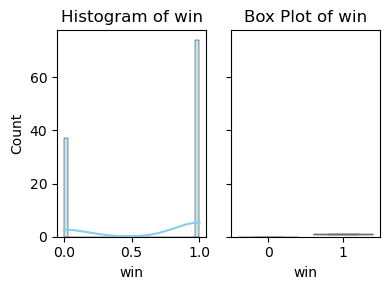

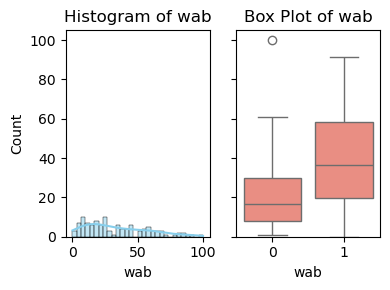

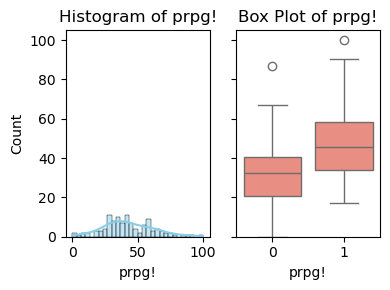

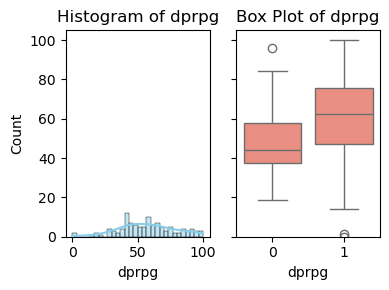

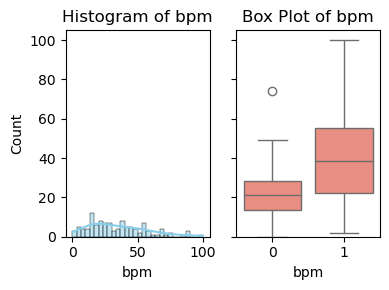

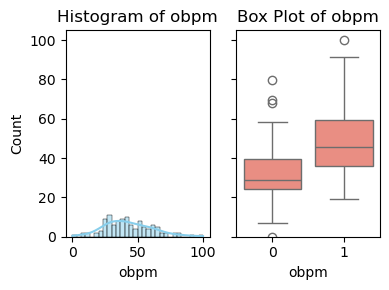

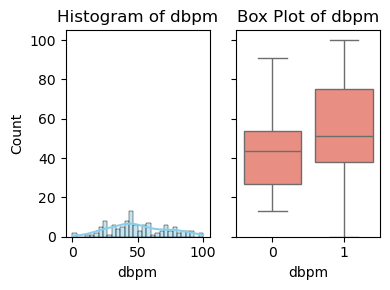

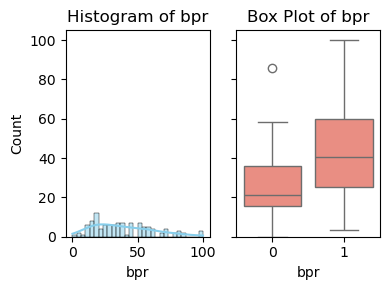

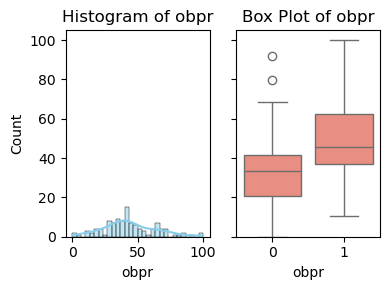

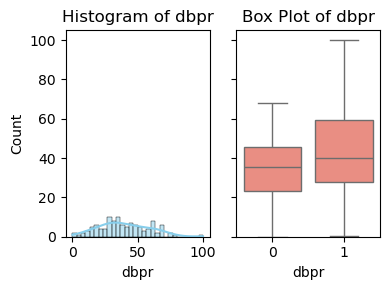

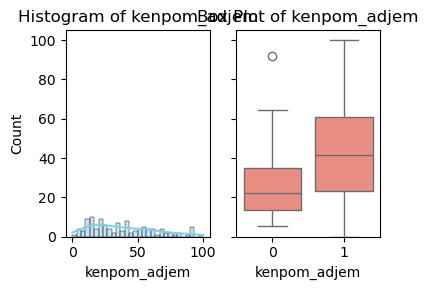

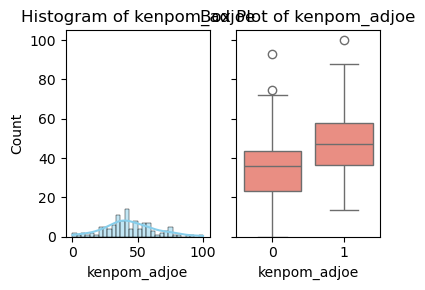

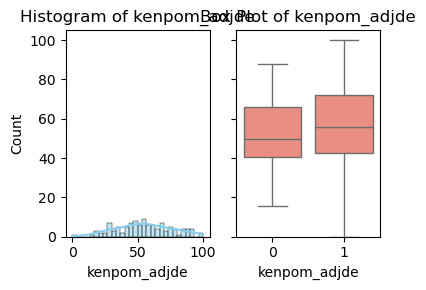

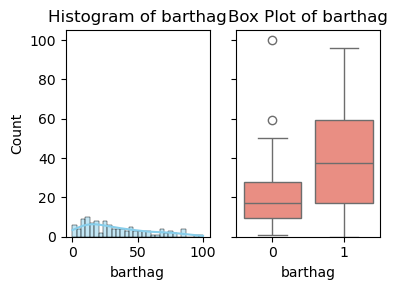

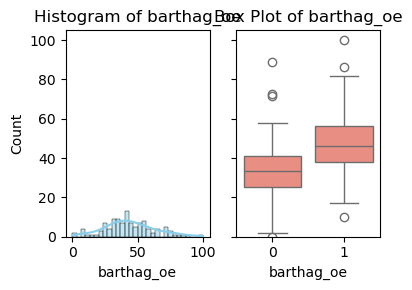

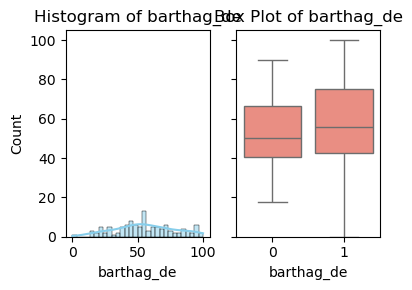

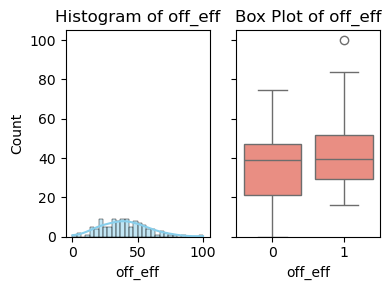

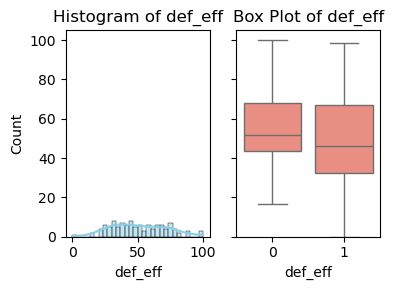

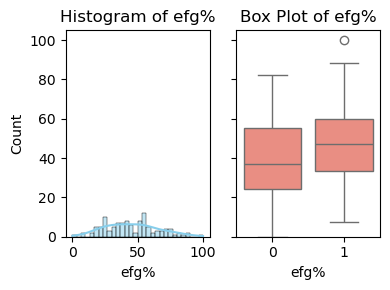

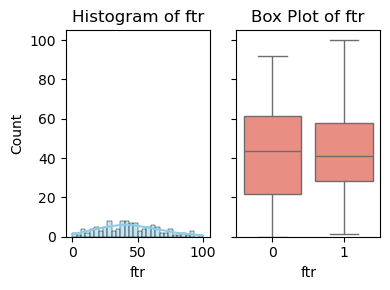

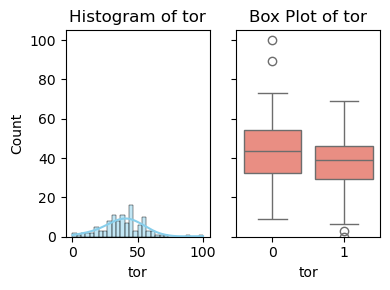

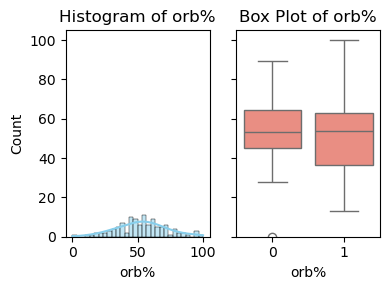

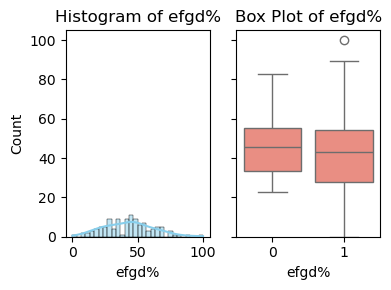

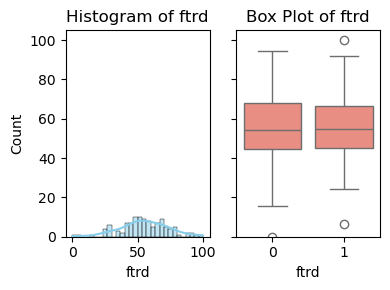

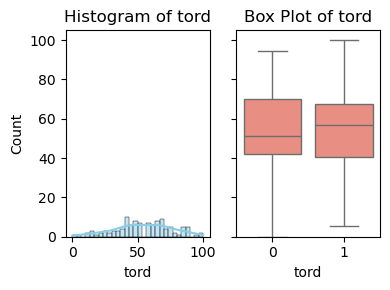

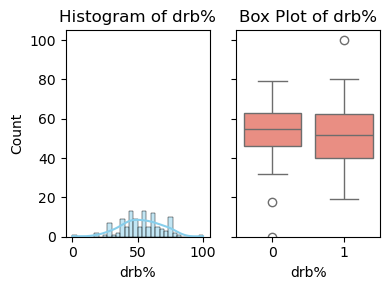

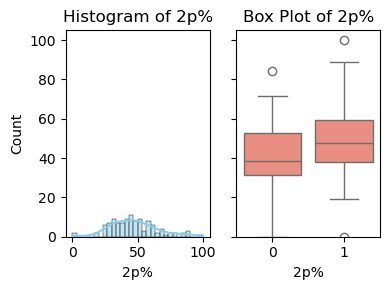

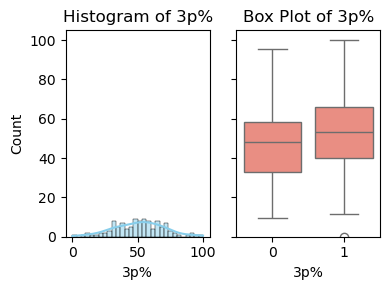

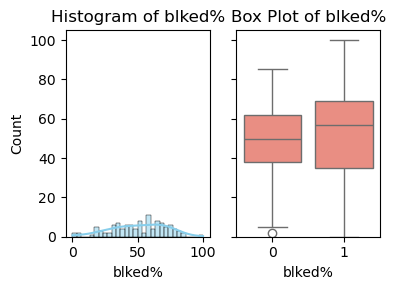

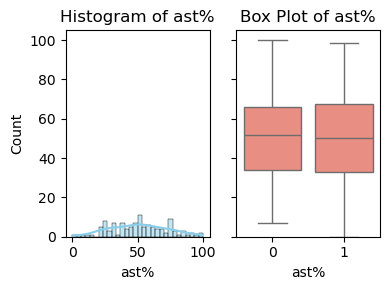

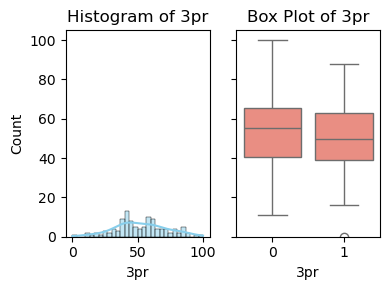

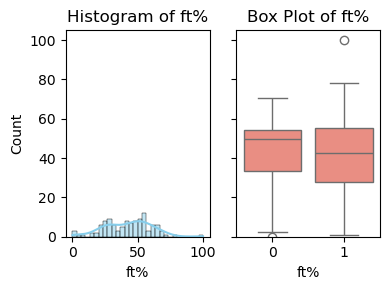

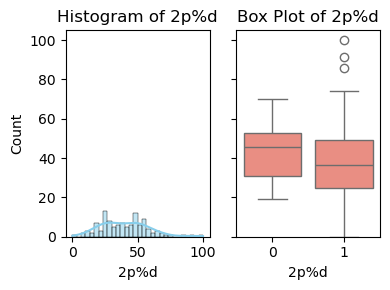

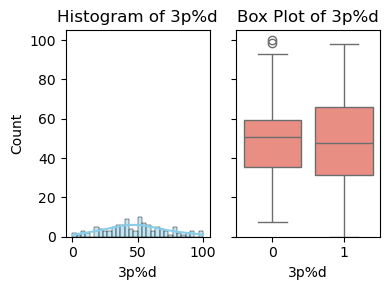

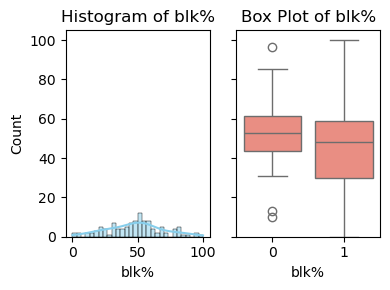

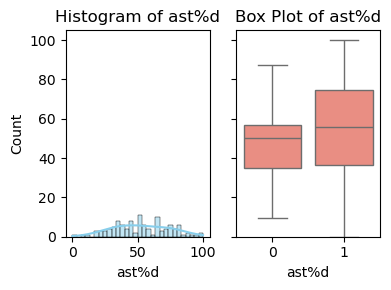

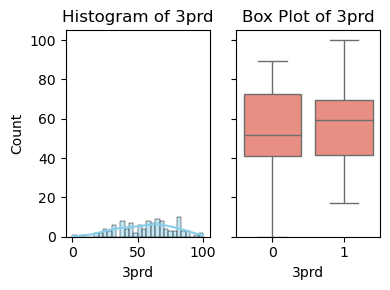

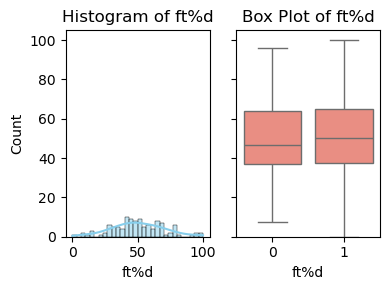

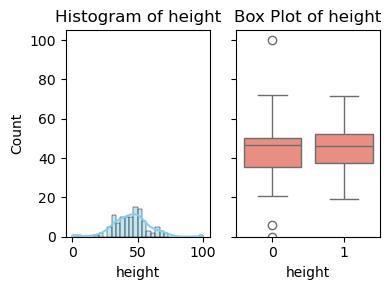

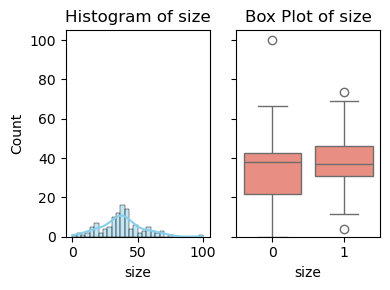

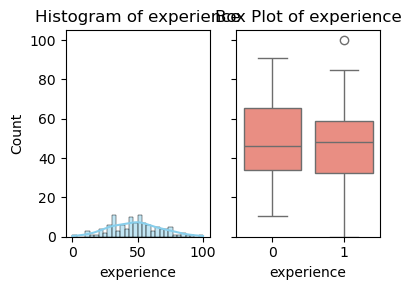

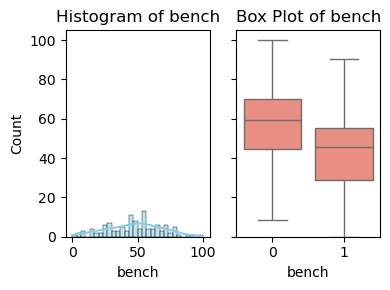

In [122]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_num
numeric_columns = train_num.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [123]:
corr_matrix = train_num.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

win            100.0000
wab             34.1200
prpg!           41.4600
dprpg           28.6300
bpm             38.3000
obpm            38.8000
dbpm            25.9200
bpr             35.3900
obpr            34.4000
dbpr            18.6000
kenpom_adjem    33.6600
kenpom_adjoe    35.1400
barthag         35.6800
barthag_oe      34.5000
barthag_de      14.9600
off_eff         17.1900
efg%            20.8500
tor             15.7900
efgd%           10.8800
2p%             17.2900
3p%             14.1100
2p%d            13.3700
blk%            16.4400
ast%d           14.1000
bench           28.3200
Name: win, dtype: float64


In [124]:
X = train_num.drop('win', axis=1)
y = train_num['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,14.3631,0.0002,0.0607
1,prpg!,22.6206,0.0000,0.0921
2,dprpg,9.7293,0.0023,0.0258
3,bpm,18.7322,0.0000,0.0474
4,obpm,19.3119,0.0000,0.1415
5,dbpm,7.8492,0.0060,0.0170
6,bpr,15.6087,0.0001,0.0594
7,obpr,14.6267,0.0002,0.0640
8,dbpr,3.9050,0.0507,0.0983
9,kenpom_adjem,13.9256,0.0003,0.0791


In [125]:
stats_df[stats_df['mutual_info'] > .05]

,feature,f_values,p_values,mutual_info
0,wab,14.3631,0.0002,0.0607
1,prpg!,22.6206,0.0000,0.0921
4,obpm,19.3119,0.0000,0.1415
6,bpr,15.6087,0.0001,0.0594
7,obpr,14.6267,0.0002,0.0640
8,dbpr,3.9050,0.0507,0.0983
9,kenpom_adjem,13.9256,0.0003,0.0791
10,kenpom_adjoe,15.3526,0.0002,0.0520
13,barthag_oe,14.7261,0.0002,0.0579
19,tor,2.7857,0.0980,0.0516


In [126]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,wab,14.3631,0.0002,0.0607
1,prpg!,22.6206,0.0000,0.0921
2,dprpg,9.7293,0.0023,0.0258
3,bpm,18.7322,0.0000,0.0474
4,obpm,19.3119,0.0000,0.1415
5,dbpm,7.8492,0.0060,0.0170
6,bpr,15.6087,0.0001,0.0594
7,obpr,14.6267,0.0002,0.0640
9,kenpom_adjem,13.9256,0.0003,0.0791
10,kenpom_adjoe,15.3526,0.0002,0.0520


In [127]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,wab,14.3631,0.0002,0.0607
1,prpg!,22.6206,0.0000,0.0921
2,dprpg,9.7293,0.0023,0.0258
3,bpm,18.7322,0.0000,0.0474
4,obpm,19.3119,0.0000,0.1415
5,dbpm,7.8492,0.0060,0.0170
6,bpr,15.6087,0.0001,0.0594
7,obpr,14.6267,0.0002,0.0640
9,kenpom_adjem,13.9256,0.0003,0.0791
10,kenpom_adjoe,15.3526,0.0002,0.0520


In [128]:
# Remove any numerical variables who hit 0 criteria
# Remove any categorical variables who's win percentage is less than Round 1 win percentage
train_df = train_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'tor', 
    'orb%', 
    'efgd%',  
    'drb%', 
    '2p%', 
    '3p%', 
    '2p%d',
    'blk%', 
    'ast%d', 
    'size', 
    'bench',
     'S_F',
     'B_B',
     'B_C',
     'B_F',
     'C_D']]

test_df = test_df[[
    'win', 
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'dbpm', 
    'bpr', 
    'obpr', 
    'dbpr', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'tor', 
    'orb%', 
    'efgd%',  
    'drb%', 
    '2p%', 
    '3p%', 
    '2p%d',
    'blk%', 
    'ast%d', 
    'size', 
    'bench',
     'S_F',
     'B_B',
     'B_C',
     'B_F',
     'C_D']]


### III. Wrapper Methods

In [136]:
X_train = train_df.iloc[:,1:]
Y_train = train_df['win']

X_test = test_df.iloc[:,1:]
Y_test = test_df['win']

float64_columns = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[float64_columns] = scaler.fit_transform(X_train[float64_columns])

X_test_scaled = X_test.copy()
X_test_scaled[float64_columns] = scaler.transform(X_test[float64_columns])

In [137]:
X_train_scaled.head()

,wab,prpg!,dprpg,bpm,obpm,dbpm,bpr,obpr,dbpr,kenpom_adjem,...,2p%d,blk%,ast%d,size,bench,S_F,B_B,B_C,B_F,C_D
169,0.9076,0.5965,0.8619,0.9415,0.1739,1.1631,0.9079,0.2509,1.2224,0.9039,...,1.2780,1.8372,-0.3896,0.4701,-0.1929,0,0,0,1,0
160,-1.2675,-1.7425,-0.6617,-1.4649,-1.8474,-0.8496,-0.9319,-1.3084,-0.0144,-1.1300,...,0.8237,1.0882,0.0127,0.2667,0.0697,0,0,0,0,0
225,-1.2152,0.0063,-0.6163,-1.4028,-0.8310,-0.6977,-1.1375,-0.0959,-1.7894,-1.3006,...,-1.1608,-0.8183,-0.5144,0.6990,-0.8108,0,0,0,0,0
24,0.4114,-1.2397,-0.2751,-0.6188,-0.7740,-0.1914,0.2018,-0.2813,0.6695,0.1047,...,0.1303,0.5435,1.6220,1.3093,0.5863,0,0,0,0,0
220,-1.0265,-0.9118,-0.5708,-0.9215,-1.0480,-0.1660,-0.9004,-0.6617,-0.7250,-1.0386,...,-0.2283,-1.2268,-0.2786,-1.6321,0.4099,0,0,0,0,0


In [138]:
X_test_scaled.head()

,wab,prpg!,dprpg,bpm,obpm,dbpm,bpr,obpr,dbpr,kenpom_adjem,...,2p%d,blk%,ast%d,size,bench,S_F,B_B,B_C,B_F,C_D
156,1.0260,0.8370,0.0660,-0.1608,0.9390,0.4922,1.0100,1.0413,0.4601,0.6617,...,-0.2283,0.0328,0.3734,1.1397,0.2786,0,0,0,0,0
304,-1.1684,-0.3872,-0.9119,-0.6033,-0.4085,-0.5964,-0.9149,-0.5261,-0.9093,-1.3144,...,0.0586,0.4413,1.2197,0.6566,-0.4343,0,0,1,0,0
253,-1.0836,-0.0811,-1.4804,-0.1841,0.6078,-0.6471,-0.8287,-0.2912,-1.0423,-1.1062,...,-0.0610,-0.4778,0.6509,-1.4202,0.9403,0,0,1,0,0
110,1.2760,1.0774,0.1342,1.0502,1.3158,0.1884,1.0994,1.2976,0.3072,1.4628,...,-0.0371,-1.1928,-0.0427,-0.6234,0.0447,1,0,0,0,0
181,1.1617,-0.5183,0.6118,-0.2229,-0.3971,1.9226,1.0039,0.3579,1.2567,0.8551,...,1.0389,3.3011,-0.0705,0.3006,1.0128,0,0,0,1,0


In [141]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [142]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 34
selected features: 13
features with coefficients shrank to zero: 21


In [143]:
selected_feat

Index(['dprpg', 'bpm', 'obpm', 'off_eff', 'def_eff', 'orb%', 'drb%', '3p%',
       '2p%d', 'blk%', 'ast%d', 'size', 'bench'],
      dtype='object')

In [145]:
# Transform datasets based on selected features
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

# Train a Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

# Convert predictions to binary using a threshold
threshold = 0.5
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Evaluate F1 scores
f1_train = f1_score(y_train, y_train_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print(f"Lasso Regression F1 Score (Train): {f1_train:.2f}")
print(f"Lasso Regression F1 Score (Test): {f1_test:.2f}")

Lasso Regression F1 Score (Train): 0.80
Lasso Regression F1 Score (Test): 0.80


In [146]:
sfs = SequentialFeatureSelector(
        estimator=RandomForestClassifier(
        n_estimators=10, n_jobs=4, random_state=0),
        n_features_to_select=10,  # the number of features to retain
        direction='backward',  # the direction of the selection procedure
        scoring='roc_auc',  # the metric to evaluate
        cv=2, # the cross-validation fold
        n_jobs=None
)


sfs = sfs.fit(X_train, y_train)

In [147]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [148]:
selected_feat= sfs.get_feature_names_out()
selected_feat

array(['prpg!', 'dprpg', 'dbpm', 'def_eff', 'efg%', 'tor', 'orb%',
       'efgd%', '2p%', '2p%d'], dtype=object)

In [149]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9784514243973703
Test set
Random Forests roc-auc: 0.6202020202020202


In [150]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9784514243973703
Test set
Random Forests roc-auc: 0.7191919191919192


In [151]:
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values

[0.6303030303030304,
 0.5727272727272728,
 0.5787878787878787,
 0.45555555555555555,
 0.47474747474747475,
 0.4939393939393939,
 0.5636363636363636,
 0.5484848484848486,
 0.5,
 0.6424242424242426,
 0.4939393939393939,
 0.5909090909090909,
 0.5818181818181818,
 0.4484848484848485,
 0.4636363636363636,
 0.5636363636363636,
 0.5181818181818182,
 0.5969696969696969,
 0.5818181818181818,
 0.48888888888888893,
 0.39797979797979793,
 0.5818181818181818,
 0.4808080808080808,
 0.30606060606060603,
 0.45555555555555555,
 0.4060606060606061,
 0.4616161616161617,
 0.3909090909090909,
 0.4484848484848485,
 0.5909090909090909,
 0.43333333333333335,
 0.5,
 0.5757575757575758,
 0.5515151515151515]

Text(0, 0.5, 'roc-auc')

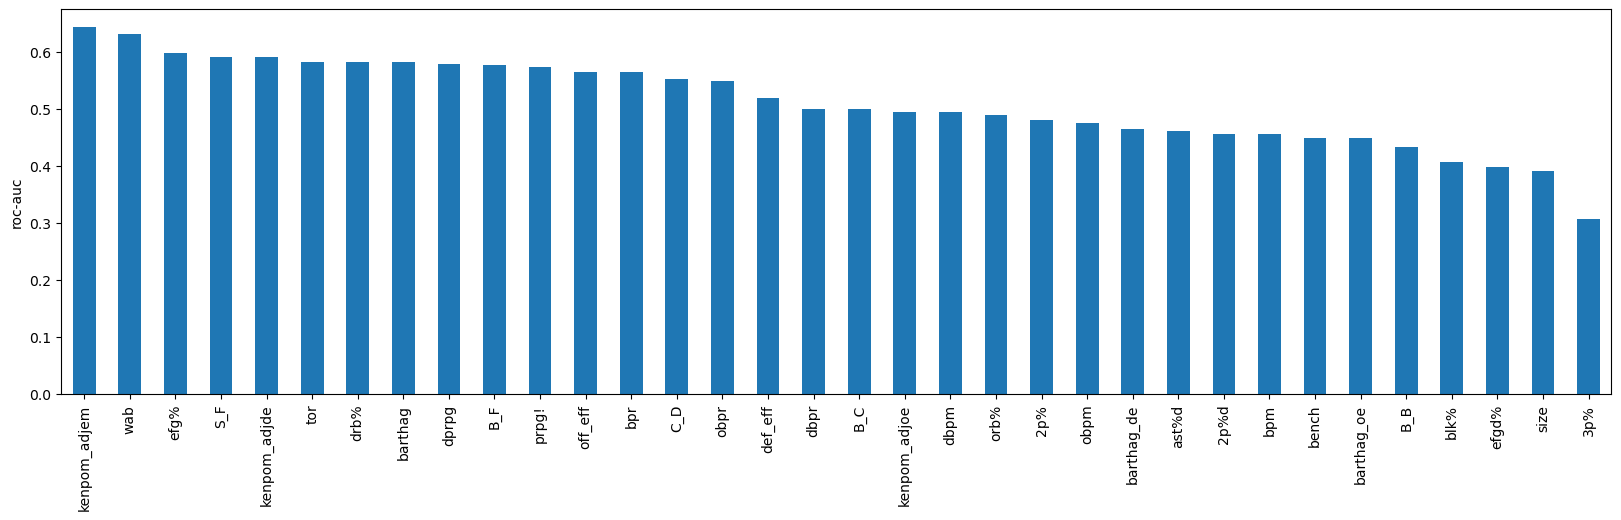

In [152]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [153]:
len(roc_values[roc_values > 0.5])

16

In [154]:
len(roc_values[roc_values > 0.6])

2

In [155]:
roc_values[roc_values > 0.5]

wab            0.6303
prpg!          0.5727
dprpg          0.5788
bpr            0.5636
obpr           0.5485
kenpom_adjem   0.6424
kenpom_adjde   0.5909
barthag        0.5818
off_eff        0.5636
def_eff        0.5182
efg%           0.5970
tor            0.5818
drb%           0.5818
S_F            0.5909
B_F            0.5758
C_D            0.5515
dtype: float64

### Exhaustive Feature Selection

In [156]:
X_train_scaled2 = X_train_scaled[[
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'bpr', 
    'obpr', 
    'kenpom_adjem',
    'barthag', 
    'off_eff', 
    'def_eff', 
    'efg%',
    'tor', 
    'orb%',  
    'drb%', 
    '2p%d',
    'bench',
     'S_F',
     'B_F',
     'C_D'
]]

X_test_scaled2 = X_test_scaled[[
    'wab', 
    'prpg!', 
    'dprpg',
    'bpm', 
    'obpm', 
    'bpr', 
    'obpr', 
    'kenpom_adjem',
    'barthag', 
    'off_eff', 
    'def_eff', 
    'efg%',
    'tor', 
    'orb%',  
    'drb%', 
    '2p%d',
    'bench',
     'S_F',
     'B_F',
     'C_D'
]]

In [157]:
# Initialize variables to track the best model
log_reg = LogisticRegression(solver='liblinear')
best_f1 = 0
best_features = []
best_train_f1 = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_f1 = f1_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_features = subset
            best_train_f1 = train_f1

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test F1 Score: {best_f1:.4f}")
print(f"Training F1 Score of Best Model: {best_train_f1:.4f}")

Best Feature Subset: ('wab', 'dprpg', 'bpm', 'orb%', 'drb%', 'S_F')
Best Test F1 Score: 0.8919
Training F1 Score of Best Model: 0.8000
